# First Stage of the Nike Project

In this data analysis project, we will immerse ourselves in the world of Nike Marketing, one of the most recognized brands worldwide in the footwear and sportswear industry. Through this analysis, we will explore various data sets related to Nike's marketing strategies, their impact on the market, and consumer perception.

The main objective of this first notebook is to clean and process all the data sets used in our analysis.

Data Set Used:

[File_1:Data_set_nike](https://data.world/crawlfeeds/products-dataset-from-nike)

[File_2:Sales_USA](https://www.kaggle.com/datasets/krishnavamsis/nike-sales)

[File_3:AdidasvsNike](https://www.kaggle.com/datasets/kaushiksuresh147/adidas-vs-nike)

[File_5:Manufactur](https://www.kaggle.com/datasets/mexwell/nike-manufacturing-locations)

# Index

1. Library

2. Reading the different Data Frames

3. Cleaning

4. Preprocessing

5. Conclusion on each data set

## 1. Library

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import matplotlib.pyplot as plt


## 2. Read Data

In [79]:
df = pd.read_csv(r"C:\Users\alede\Desktop\TERCER_PROYECTO\data_nike\nike_2020_04_13.csv")
df1 = pd.read_csv(r"C:\Users\alede\Desktop\TERCER_PROYECTO\data_nike\Nike Dataset.csv")
f_adi_nik = pd.read_csv(r"C:\Users\alede\Desktop\TERCER_PROYECTO\data_nike\Adidas Vs Nike.csv")
df_manuf = pd.read_csv(r"C:\Users\alede\Desktop\TERCER_PROYECTO\data_nike\manufacturinglocation.csv", sep=';')

## 3. Cleaning Data

In [80]:
# size of the four data set
shape1= df.shape
shape2 =df1.shape
shape3 = f_adi_nik.shape
shape4 = df_manuf.shape
print(shape1, shape2, shape3, shape4)


(643, 12) (9360, 9) (3268, 10) (639, 16)


In [81]:
#first line of data set information
heat1 = df.head(1)
heat2 = df1.head(1)
heat3 = f_adi_nik.head(1)
heat4 = df_manuf.head(1)
heat1


,URL,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
0,https://www.nike.com/in/t/air-force-1-07-essen...,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:56


In [82]:
heat2

,Invoice Date,Product,Region,Retailer,Sales Method,State,Price per Unit,Total Sales,Units Sold
0,01-01-2020,Men's Street Footwear,Northeast,Foot Locker,In-store,New York,50,6000,120


In [83]:
heat3

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14


In [84]:
heat4

,Factory Name,Factory Type,Product Type Type,"Nike, Inc. Brand(s)",Events,Supplier Group,Address,City,State,Postal Code,Country / Region,Region,Total Workers,Line Workers,% Female Workers,% Migrant Workers
0,"A & K Designs, Inc.",FINISHED GOODS,Apparel,Nike,NaN,A & K DESIGNS,8564 NE Alderwood Road,Portland,Oregon,97220,USA,AMERICAS,111,95,73,0


In [85]:
#check duplicates
dup1 = df.duplicated().sum()
dup2 = df1.duplicated().sum()
dup3 = f_adi_nik.duplicated().sum()
dup4 = df_manuf.duplicated().sum()
print(dup1, dup2, dup3, dup4)

0 0 0 0


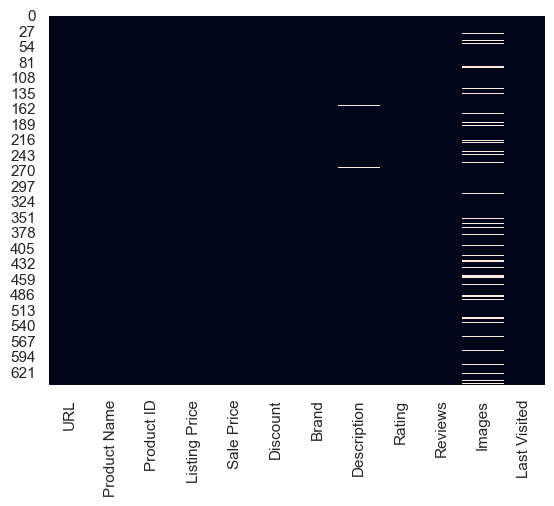

In [86]:
#Checking for null values
null1 = sns.heatmap(df.isnull(), cbar=False)

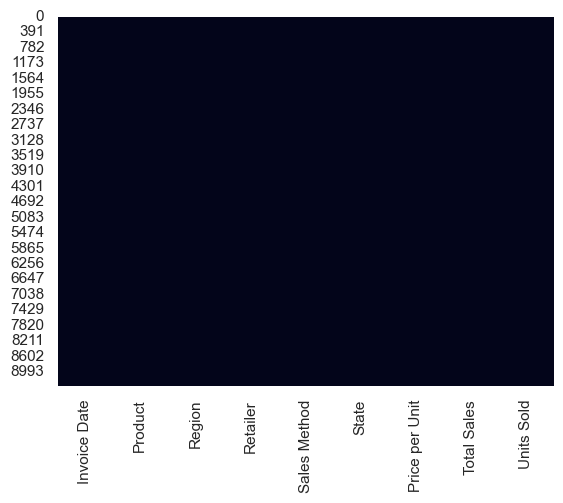

In [87]:
null2 = sns.heatmap(df1.isnull(), cbar=False)

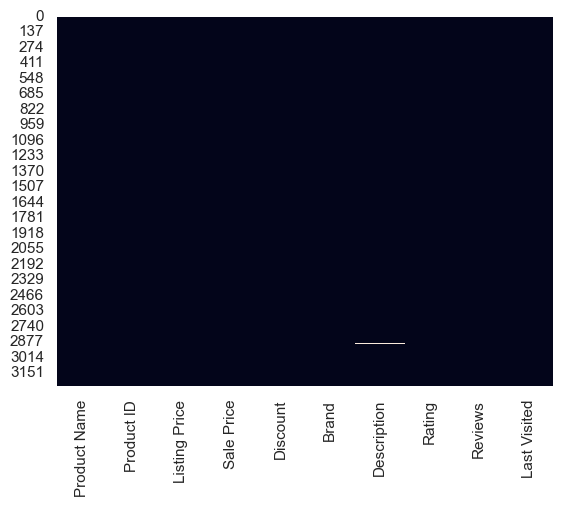

In [88]:
null3 = sns.heatmap(f_adi_nik.isnull(), cbar=False)

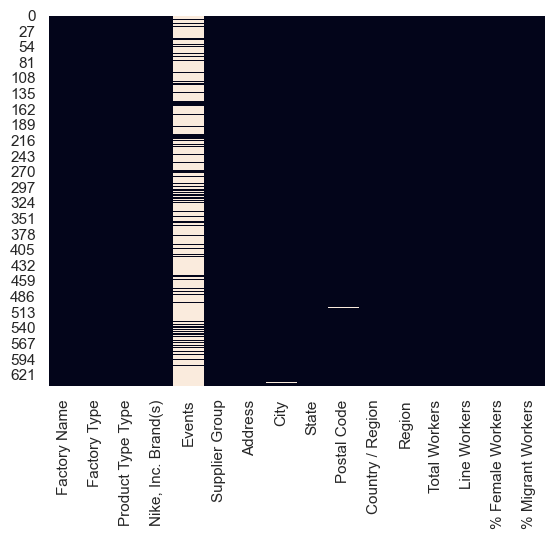

In [89]:
null4 = sns.heatmap(df_manuf.isnull(), cbar=False)

In [90]:
# Type of data
type1 = df.dtypes
type2 = df1.dtypes
type3 = f_adi_nik.dtypes
type4 = df_manuf.dtypes
print(type1, type2)

URL               object
Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Description       object
Rating           float64
Reviews            int64
Images            object
Last Visited      object
dtype: object Invoice Date      object
Product           object
Region            object
Retailer          object
Sales Method      object
State             object
Price per Unit     int64
Total Sales        int64
Units Sold         int64
dtype: object


In [91]:
print( type3, type4)

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Description       object
Rating           float64
Reviews            int64
Last Visited      object
dtype: object Factory Name           object
Factory Type           object
Product Type Type      object
Nike, Inc. Brand(s)    object
Events                 object
Supplier Group         object
Address                object
City                   object
State                  object
Postal Code            object
Country / Region       object
Region                 object
Total Workers           int64
Line Workers            int64
% Female Workers       object
% Migrant Workers       int64
dtype: object


## 4.Preprocessing 

We will begin by performing extensive data processing, which involves handling missing values, removing duplicates, correcting potential errors in the data, and properly formatting data types as necessary. This step is crucial to ensure the quality and integrity of our data before performing any analysis.

* Data frame Nike_product

In [92]:
# Make a df copy for each
nike_product = df.copy()
#Remove columns that are not going to be used
nike_product.drop(['URL' , 'Listing Price', 
'Discount', 'Brand'] , axis=1, inplace=True)

In [93]:
#Repair of other columns
nike_product['Images'].isnull().sum()
nike_product['Images'].fillna('No Image', inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14700\3460281402.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nike_product['Images'].fillna('No Image', inplace=True)


In [94]:
nike_product['Description'].isnull().sum()
nike_product['Description'].fillna('No Description', inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14700\2650598463.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nike_product['Description'].fillna('No Description', inplace=True)


In [95]:
#Check the column if it is in date format
date_column = 'Last Visited'
try:
     nike_product[date_column] = pd.to_datetime(nike_product[date_column])
     print("Column '{}' is in date format.".format(date_column))
except ValueError:
     print("Column '{}' is not in date format.".format(date_column))

Column 'Last Visited' is in date format.


In [96]:
# Detect Outliers of numerical variables
def detectar_outlierscol(nike_product, cols):
    z_scores = zscore(nike_product[cols])
    abs_z_scores = np.abs(z_scores)
    return (abs_z_scores > 3) | (abs_z_scores < -3)
#Print outliers
outliers = detectar_outlierscol(nike_product, ['Sale Price', 'Reviews'])
outliers_sum = outliers.sum()
print(outliers_sum)

Sale Price     5
Reviews       15
dtype: int64


Let's view the outliers of the Reviews column

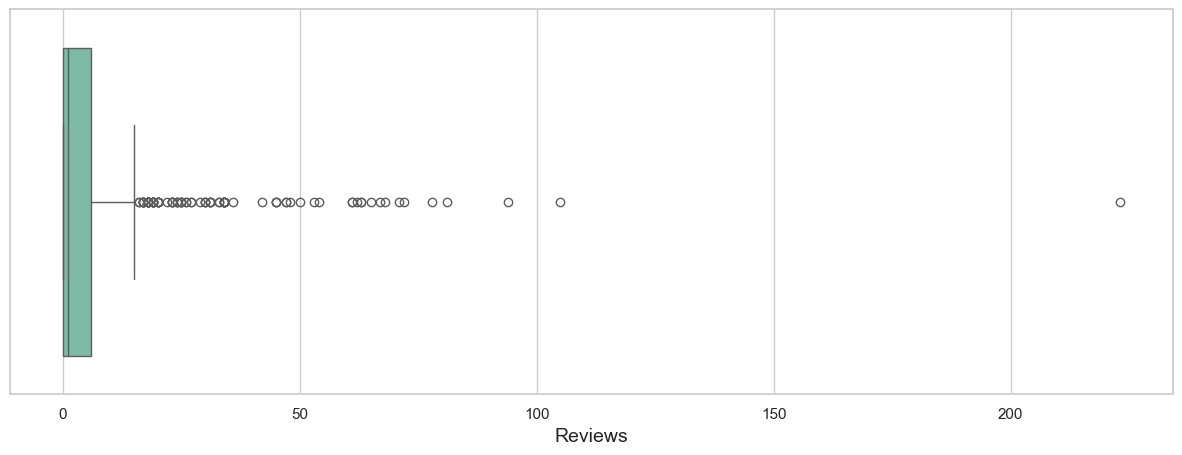

In [97]:
plt.figure(figsize=(15, 5)) 
sns.set(style="whitegrid")
fig = sns.boxplot(x="Reviews", data=nike_product, color = '#73C4A8')  
fig.set_xlabel('Reviews', fontsize=14)
plt.show()

In [98]:
nike_product['Reviews'].unique()

array([  0,   1,  14,   2,   9,  67,  48,  34,  16,   6,  22,  65,   4,
         5,   7,   3,  13,  61,  31,  47,   8,  33,  27,  11,  10,  20,
        12,  18,  81,  25, 223,  24,  17,  50,  54,  68,  15,  23, 105,
        30,  94,  62,  19,  29,  78,  45,  71,  72,  42,  26,  63,  36,
        53], dtype=int64)

In [99]:
nike_product['Sale Price'].unique()

array([ 7495,  9995,  5995, 15995, 14995, 10495,  7995, 16995,  5495,
        5597, 10995, 11995, 18995,  2495,  1995, 11997, 13995,  8995,
        7595,  6495, 12995, 22995, 11197,  4995,  6995, 24995,  8397,
        7797,  5997,  8795,  7697, 13597,  6997,  9597,  8495,  4797,
        8797,  6597, 12797,  5947, 20995, 10497,  3997,  7197,  1595,
       15197,  9637, 13495,  5247, 14495,  4497,  5295, 21995,  7997,
        8997,  6397, 14397,  3995, 10197,  4495,  5397,  9495,  7295,
        3497, 15997,  6297,  2795, 19995,  4897,  2097, 11897,  9097,
       10397,  6595,  9797, 12597,  3147, 17995, 13297,  3597,  6317,
        4197,  2397,  4547,  3357,  2995,  3695,  6797, 36500,  3197,
        7597], dtype=int64)

## Conclusion:

The columns that are going to be used have been verified as:
- 'Sale price' does not have duplicate values, it is in int format but we do not know what type of currency it is.

- 'Review' is in int format. It is an interesting variable to correlate with the price.

- 'Rating' is in float. It can also be correlated

- 'Last Visited' is checked if it is in date format and it is checked if it is.

- The outlier values of the two variables are identified. The Reviews variable contains customer reviews and some products have more reviews than others. On the other hand, in the case of Price, some products are more expensive than others.

* Data Frame Nike_Sales

In [100]:
nike_sales = df1.copy()

In [101]:
date_column2 = 'Invoice Date'
try:
     nike_sales[date_column2] = pd.to_datetime(nike_sales[date_column2])
     print("Column '{}' is in date format.".format(date_column2))
except ValueError:
     print("Column '{}' is not in date format.".format(date_column2))

Column 'Invoice Date' is not in date format.


In [102]:
#Change the column in date format
nike_sales['Invoice Date'] = pd.to_datetime(nike_sales['Invoice Date'], format='%d-%m-%Y')

In [103]:
# Detect Outliers of numerical variables
def detectar_outlierscol(nike_sales, cols):
    z_scores = zscore(nike_sales[cols])
    abs_z_scores = np.abs(z_scores)
    return (abs_z_scores > 3) | (abs_z_scores < -3)
#Print outliers
outliers = detectar_outlierscol(nike_sales, ['Price per Unit', 'Total Sales', 'Units Sold'])
outliers_sum = outliers.sum()
print(outliers_sum)

Price per Unit     57
Total Sales       181
Units Sold        116
dtype: int64


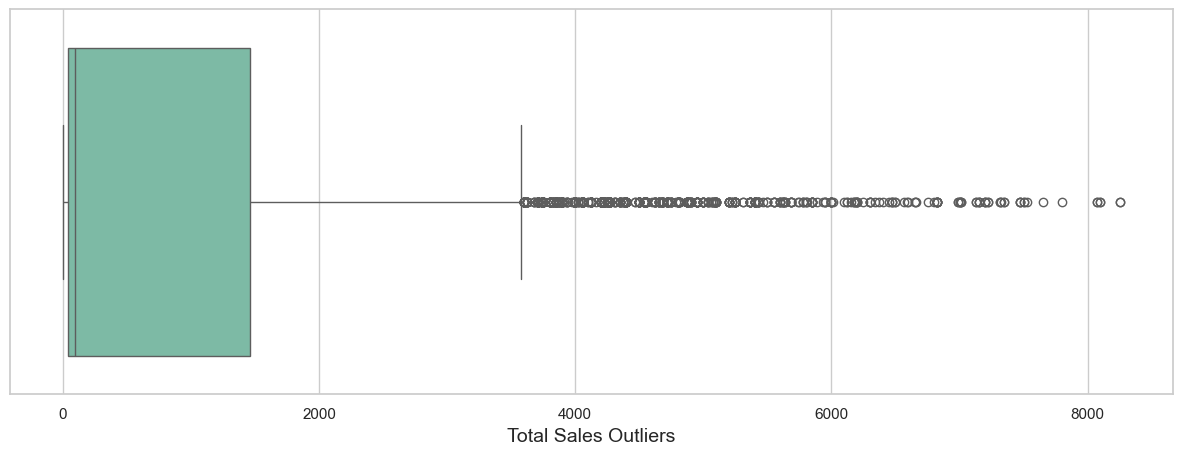

In [104]:
plt.figure(figsize=(15, 5)) 
sns.set(style="whitegrid")
fig = sns.boxplot(x="Total Sales", data=nike_sales, color = '#73C4A8')  
fig.set_xlabel('Total Sales Outliers', fontsize=14)
plt.show()

It is observed with the boxsplot graph that the values in the Total Sales column, the median (center line) is almost 100% on the left side. Additionally, the number of points outside the whiskers is observed. These points may be unusual or extreme data that may require additional investigation.

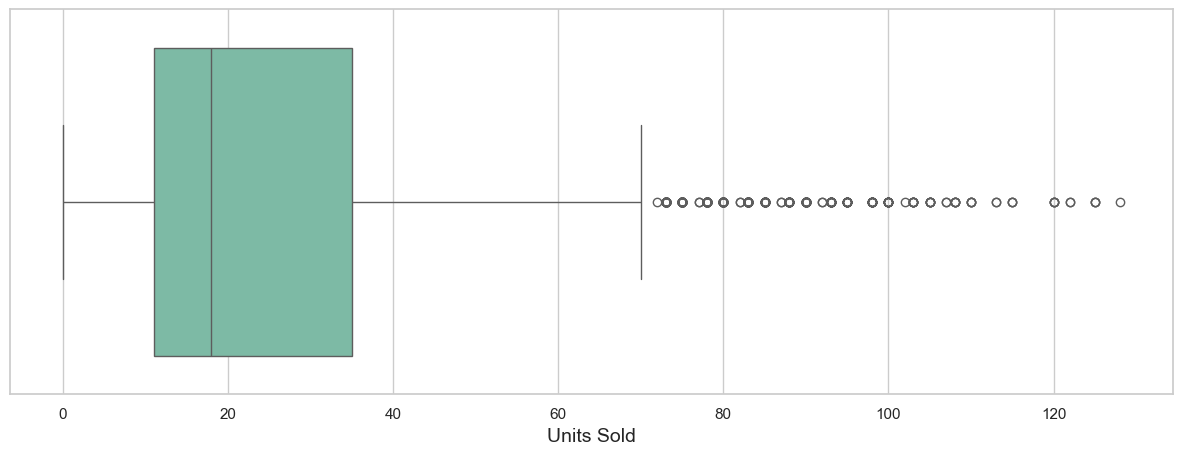

In [105]:
plt.figure(figsize=(15, 5)) 
sns.set(style="whitegrid")
fig = sns.boxplot(x="Units Sold", data=nike_sales, color = '#73C4A8')  
fig.set_xlabel('Units Sold', fontsize=14)
plt.show()

## Conclusion:

The columns are checked:
- 'Invoice Date' and it is verified that it is not in date format, so it is modified.
- 'Price per Unit' is verified that it is in int and also that it does not have any symbol.
- The outliers of the 'Price per Unit' columns are verified with 27
  outliers. 'Total Sales' with 152 ouliers and 'Units Sold' with 102.
- The atypical values of the last two columns mentioned above reflect that there are different sales amounts, some very high and others very low and products that sold more than others.

* Data frame Adidas vs Nike

In [108]:
adidas_nike = f_adi_nik.copy()
adidas_nike.drop(['Product ID'], axis=1, inplace=True)

In [109]:
##Check the format of the last visited column
date_column3 = 'Last Visited'
try:
     adidas_nike[date_column3] = pd.to_datetime(adidas_nike[date_column3])
     print("Column '{}' is in date format.".format(date_column3))
except ValueError:
     print("Column '{}' is not in date format.".format(date_column3))

Column 'Last Visited' is in date format.


In [128]:
adidas_nike['Description'].isnull().sum()

3

In [129]:
# # Fill null values with the word No Description
not_null = adidas_nike['Description'].fillna('No Description', inplace=True)

In [110]:
# Detect Outliers of numerical variables
def detectar_outlierscol(adidas_nike, cols):
    z_scores = zscore(adidas_nike[cols])
    abs_z_scores = np.abs(z_scores)
    return (abs_z_scores > 3) | (abs_z_scores < -3)

outliers = detectar_outlierscol(adidas_nike, ['Listing Price', 'Sale Price', 'Discount', 'Rating'])
outliers_sum = outliers.sum()
print(outliers_sum)

Listing Price    30
Sale Price       47
Discount          0
Rating            0
dtype: int64


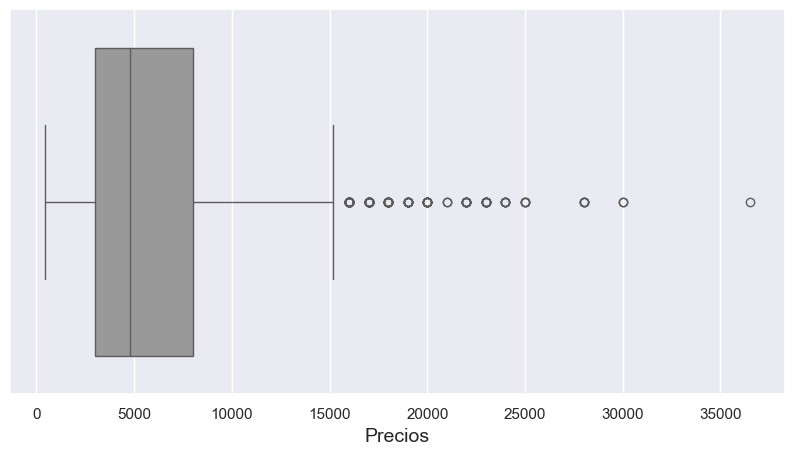

In [111]:
# Display the deviation of the 'Sale Price' variable
plt.figure(figsize=(10, 5))  
sns.set(style="darkgrid")  
fig = sns.boxplot(x="Sale Price", data=adidas_nike , color = '#999999')
fig.set_xlabel('Precios', fontsize=14)
plt.show()

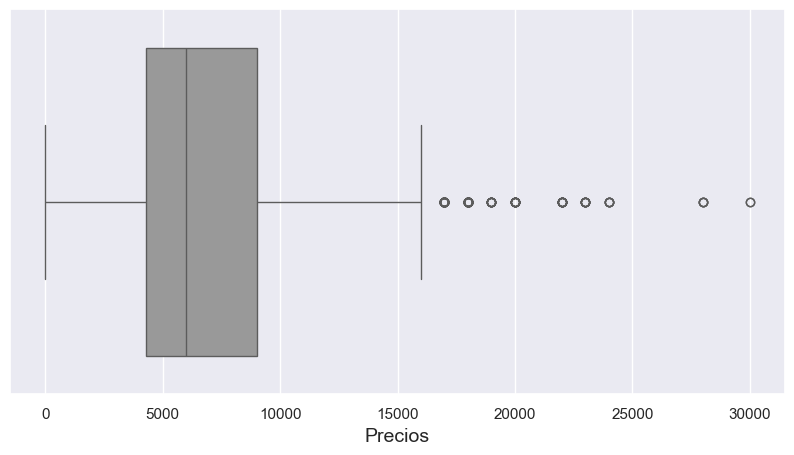

In [112]:
# Display the deviation of the 'Listing Price' variable
plt.figure(figsize=(10, 5))  
sns.set(style="darkgrid")  
fig = sns.boxplot(x="Listing Price", data=adidas_nike , color = '#999999')
fig.set_xlabel('Precios', fontsize=14)
plt.show()

## Conclusion: 

- The 'Product ID' column is eliminated since it is not considered necessary when verifying.

- 'Last Visited' the column is verified and the format of the column is observed as date type and with ISO 8601 time (YYYY-MM-DDTHH:MM:SS)

- The outliers of the Listing Price and Sale Price columns are verified. It is observed that both have almost the same amount of ouliers.

* Data frame Manufacturing Location

In [113]:
location = df_manuf.copy() #New df
location.drop(['Events',  'Postal Code'], axis=1, inplace=True) #Deletion of columns

In [114]:
#We modify the '% Female Workers' column from object to float by this value: '17.297297292973'
location['% Female Workers'] = location['% Female Workers'].str.replace(',', '.').astype(float)

In [115]:
# Verification if it is only the Nike factory
location['Nike, Inc. Brand(s)'].unique()

array(['Nike', 'Converse'], dtype=object)

In [116]:
num_converse = location['Nike, Inc. Brand(s)'].str.contains('converse', case=False).sum()
print("Number of rows that contained 'converse':", num_converse)

Number of rows that contained 'converse': 36


In [117]:
location = location[~location['Nike, Inc. Brand(s)'].str.contains('converse', case=False)]
# We convert the rows that say converse to False and True to Nike
location.reset_index(drop=True, inplace=True)
#Reset the index after deleting

In [132]:
location['City'].isnull().sum()

1

In [134]:
# Fill null values with the word NaN
not_nulls = location['City'].fillna('Nan', inplace=True)

In [118]:
# Detect Outliers of numerical variables
def detectar_outlierscol(location, cols):
    z_scores = zscore(location[cols])
    abs_z_scores = np.abs(z_scores)
    return (abs_z_scores > 3) | (abs_z_scores < -3)

outliers = detectar_outlierscol(location, ['Total Workers', 'Line Workers','% Female Workers', '% Migrant Workers'])
outliers_sum = outliers.sum()
print(outliers_sum)

Total Workers        19
Line Workers         18
% Female Workers      0
% Migrant Workers    25
dtype: int64


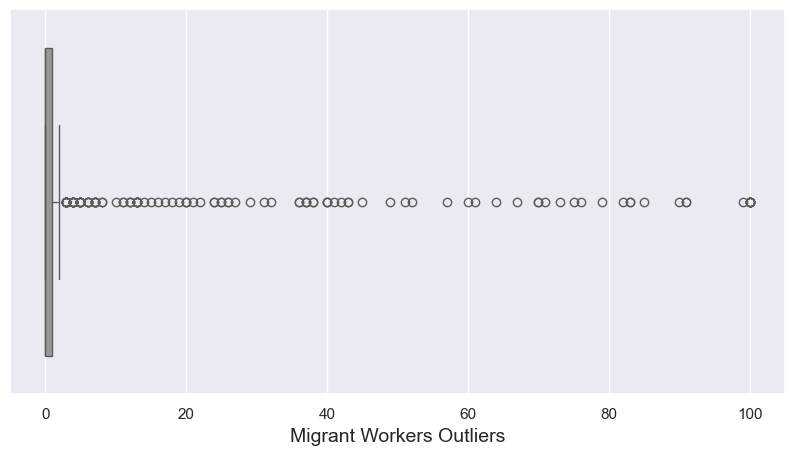

In [119]:
# Display the deviation of the 'Migrant Workers' variable
plt.figure(figsize=(10, 5))  
sns.set(style="darkgrid")  
fig = sns.boxplot(x="% Migrant Workers", data=location , color = '#999999')
fig.set_xlabel('Migrant Workers Outliers', fontsize=14)
plt.show()

In [120]:
location['% Migrant Workers'].unique()

array([  0,  75,   5,  12,   7,   1,   3,  79,  32,  49,  20,  16,  25,
        17,  15,  51, 100,  70,  10,   8,   4,  24,  40,  57,  11,  67,
        37,   6,  43,  91,  13,  85,  42,  83,  26,   2,  29,  36,  19,
        82,  38,  76,  31,  60,  71,  45,  22,  14,  41,  27,  90,  64,
        73,  99,  18,  52,  61,  21], dtype=int64)

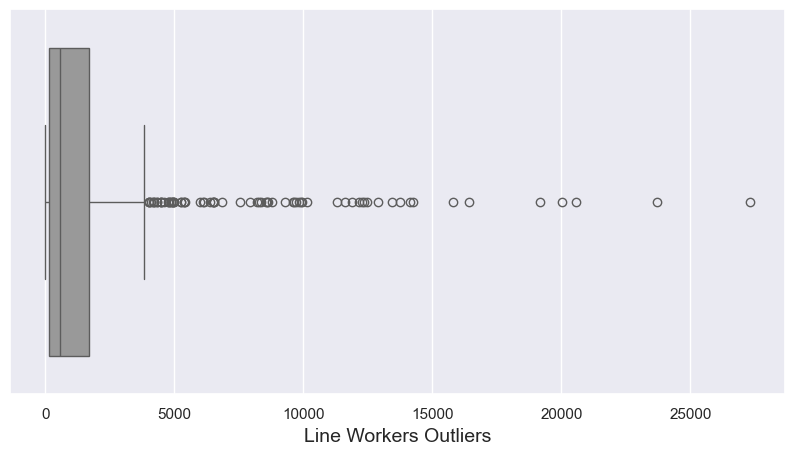

In [121]:
# Display the deviation of the 'Line Workers' variable
plt.figure(figsize=(10, 5))  
sns.set(style="darkgrid")  
fig = sns.boxplot(x="Line Workers", data=location , color = '#999999')
fig.set_xlabel('Line Workers Outliers', fontsize=14)
plt.show()

In [122]:
location['Line Workers'].unique()

array([   95,   318,  1166,   906,   861,  1153,  1275,  2137,  2568,
         320,    80,  4317, 20012,  1391,   104,   359,   571,   255,
           1,  1822,   585,   800,   241,  1983,   350,   120,    30,
         340,   329,     4,  2994,    51,  1969,    41,  1794,   991,
        4782,  1400,   823,  1105,  2229,  2829,  1190,  1025,  3517,
         125,   304,  4883,   724,  1469,  2613, 14259,  5369, 27305,
         112,    22,   323,  1526,    88,   193,   101,   121,   462,
        4867,  1762,  1289,  1086,  3195,   115,   170,    36,   262,
          55,    90,   192,    53,    66,  1093,  1814,  3202,    40,
         227,  8569,  1679,   449,   233,  2245,  2655,    13,   342,
         222,  2425,   188,    50,   330,  9631,  8592, 20589,  9707,
         570,    67,   406,   267,   735,    12,   314,    35,   150,
         379,    24,    10,   137,  2563,  1570,   631,  4951,   250,
         565,  4181,   168,   234,   138,   591,   811,   358,   335,
          16,    46,

## Conclusion:

- The 'Events' and 'Postal Code' columns are eliminated since it is determined that they will not be useful

- The '% Female Workers' column is verified and it is observed that it is not in a numerical category like the '% Male Workers' column, so it is modified with float type.

- It is observed in the 'Nike, Inc. Brand(s)' column that there are two brands, Converse and Nike. We proceed to eliminate all the 36 rows where converse appears because in the analysis we are only interested in the locations of the Nike factories.

- The outliers of the columns are verified and it is visualized using the boxplot graph that there is a difference between the Line Workers and Migrant Workers column box. When looking at the unique values of both variables, it is observed that Line workers contains more atypical variables than Migrant Workers.

In [136]:
# Save clean DFs
nike_product.to_csv('nike_product.csv', index=True)
nike_sales.to_csv('nike_sales.csv', index=True)
adidas_nike.to_csv('adidas_nike.csv', index=True)
location.to_csv('Location.cvs', index=True)